In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas 
import sklearn
from sklearn import linear_model
from pandas import DataFrame
import seaborn as sn
from sklearn import preprocessing 

# 导入数据

In [155]:
df1 = pandas.read_excel('病人疗效评价增加数据特征.xlsx',sheet_name = 'Sheet1')
df2 = pandas.read_excel('病人疗效评价增加数据特征_sheet2.xlsx',sheet_name = 'Sheet1')
df3 = pandas.read_excel('病人疗效评价特征找回.xlsx',sheet_name = '所有的features')
df3.rename(columns={'NumberOfVoxel':'NumberOfVoxel_1', 'SurfaceArea':'SurfaceArea_1', 'Volume':'Volume_1',
                   'Coarseness':'Coarseness_1', 'Complexity':'Complexity_1', 'Contrast':'Contrast_1',
                   'TextureStrength':'TextureStrength_1', 'GlobalEntropy':'GlobalEntropy_1', 'GlobalMean':'GlobalMean_1', 
                   'GlobalMedian':'GlobalMedian_1','GlobalStd':'GlobalStd_1', 'GlobalUniformity':'GlobalUniformity_1', 
                   'Kurtosis':'Kurtosis_1', 'Range':'Range_1', 'Skewness':'Skewness_1',
                   'GlobalEntropy.1':'GlobalEntropy_2', 'GlobalMean.1':'GlobalMean_2', 'GlobalStd.1':'GlobalStd_2', 
                   'GlobalUniformity.1':'GlobalUniformity_2','Kurtosis.1':'Kurtosis_2', 'Skewness.1':'Skewness_2'}, inplace=True)

# df1 = df1.iloc[0:94,[0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
# df2 = df2.iloc[0:94,[0,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
df1 = df1.iloc[0:94,3:32]
df2 = df2.iloc[0:94,7:24]
df3 = df3.iloc[0:94,11:]

df = pd.concat([df1,df2,df3],axis=1)

df.rename(columns={'性别': 'sex', '年龄': 'age', '放疗方式': 'radiotherapy_way', '剂量': 'dosage', '化疗': 'chemotherapy', '疗效评价':'evaluation'}, inplace=True)
df.rename(columns={'Dmax':'PTV_Dmax','Dmean':'PTV_Dmean','V93':'PTV_V93', 'V95':'PTV_V95', 'HI':'PTV_HI',
                   'Dmax.1':'Cord_Dmax', 'D2':'Cord_D2', 
                   'Dmean.1':'Heart_Dmean', 'V25':'Heart_V25','V30':'Heart_V30', 'V50':'Heart_V50', 
                   'V5':'Lung_V5', 'V10':'Lung_V10', 'V13':'Lung_V13', 'V20':'Lung_V20', 'V30.1':'Lung_V30', 'LMD':'Lung_LMD'},
                   inplace = True)
df.evaluation = df.evaluation.replace('PR',1)
df.evaluation = df.evaluation.replace('NR',0)
df.evaluation = df.evaluation.replace('CR',1) 
df.evaluation = df.evaluation.replace('PD',0) 
df.evaluation = df.evaluation.replace('SD',0)
df.sex = df.sex.replace('男',0)
df.sex = df.sex.replace('女',1)  

df_copy_non_standard = df.copy()

columns1 =['sex', 'age', 'radiotherapy_way', 'dosage', 'chemotherapy',
       'NumberOfVoxel', 'SurfaceArea', 'Volume', 'X.333.1Contrast',
       'X0.1Contrast', 'X.333.1Correlation', 'X0.1Correlation',
       'X.333.1Energy', 'X0.1Energy', 'X333..REF.', 'X0.1Homogeneity',
       'Coarseness', 'Complexity', 'Contrast', 'TextureStrength',
       'GlobalEntropy', 'GlobalMean', 'GlobalMedian', 'GlobalStd',
       'GlobalUniformity', 'Kurtosis', 'Range', 'Skewness', 'PTV_Dmax',
       'PTV_Dmean', 'PTV_V93', 'PTV_V95', 'PTV_HI', 'Cord_Dmax', 'Cord_D2',
       'Heart_Dmean', 'Heart_V25', 'Heart_V30', 'Heart_V50', 'Lung_V5',
       'Lung_V10', 'Lung_V13', 'Lung_V20', 'Lung_V30', 'Lung_LMD',
       'NumberOfVoxel_1', 'SurfaceArea_1', 'Volume_1', '-333-1Contrast',
       '0-1Contrast', '45-1Contrast', '90-1Contrast', '135-1Contrast',
       '-333-1Correlation', '0-1Correlation', '45-1Correlation',
       '90-1Correlation', '135-1Correlation', '-333-1Energy', '0-1Energy',
       '45-1Energy', '90-1Energy', '135-1Energy', '-333-1Homogeneity',
       '0-1Homogeneity', '45-1Homogeneity', '90-1Homogeneity',
       '135-1Homogeneity', 'Busyness', 'Coarseness_1', 'Complexity_1',
       'Contrast_1', 'TextureStrength_1', 'GlobalEntropy_1', 'GlobalMean_1',
       'GlobalMedian_1', 'GlobalStd_1', 'GlobalUniformity_1', 'Kurtosis_1',
       'Range_1', 'Skewness_1', 'GlobalEntropy_2', 'GlobalMean_2',
       'GlobalStd_2', 'GlobalUniformity_2', 'Kurtosis_2', 'Skewness_2']
# print(sum(columns1))
for i in columns1:
    df[i]=preprocessing.scale(df[i])   # 对所有特征进行归一化，这里是所有特征，共86个
print(df.columns)
print(df.columns.value_counts())

df_copy = df.copy()    # df_copy包括了所有的特征和标签，因为后面df会删除evaluation，所以这里先搞了一个df_copy

# print(df)

data = df.drop('evaluation',axis = 1)
data_train = data.iloc[:70,:]  # 训练集的特征
data_test = data.iloc[70:94,:]  # 测试集的特征

# data_no_dosage = data.drop('dosage',axis = 1)
# data_no_dosage_train = data.iloc[:70,:]
# data_no_dosage_test = data.iloc[:70,:]

label = df.pop('evaluation')   # 这个label是series类型,把evaluation从df里面删除
label = label.astype(np.int)
df_label = DataFrame(label,columns = ['evaluation'])  # df_label是dataframe
label_train = df_label.iloc[:70,:]  # 训练集的标签
label_test = df_label.iloc[70:94,:]  # 测试集的标签

label_1 = df_label[df_label.evaluation == 1]
label_0 = df_label[df_label.evaluation == 0]

Index(['sex', 'age', 'radiotherapy_way', 'dosage', 'chemotherapy',
       'evaluation', 'NumberOfVoxel', 'SurfaceArea', 'Volume',
       'X.333.1Contrast', 'X0.1Contrast', 'X.333.1Correlation',
       'X0.1Correlation', 'X.333.1Energy', 'X0.1Energy', 'X333..REF.',
       'X0.1Homogeneity', 'Coarseness', 'Complexity', 'Contrast',
       'TextureStrength', 'GlobalEntropy', 'GlobalMean', 'GlobalMedian',
       'GlobalStd', 'GlobalUniformity', 'Kurtosis', 'Range', 'Skewness',
       'PTV_Dmax', 'PTV_Dmean', 'PTV_V93', 'PTV_V95', 'PTV_HI', 'Cord_Dmax',
       'Cord_D2', 'Heart_Dmean', 'Heart_V25', 'Heart_V30', 'Heart_V50',
       'Lung_V5', 'Lung_V10', 'Lung_V13', 'Lung_V20', 'Lung_V30', 'Lung_LMD',
       'NumberOfVoxel_1', 'SurfaceArea_1', 'Volume_1', '-333-1Contrast',
       '0-1Contrast', '45-1Contrast', '90-1Contrast', '135-1Contrast',
       '-333-1Correlation', '0-1Correlation', '45-1Correlation',
       '90-1Correlation', '135-1Correlation', '-333-1Energy', '0-1Energy',
       '45-1

C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


# 描述性分析

In [147]:
print(data.info())
print(df_label.info())
print(df_label['evaluation'].value_counts())
all_feature = ['sex','radiotherapy_way','chemotherapy','NumberOfVoxel', 'SurfaceArea','Volume','X.333.1Contrast',
               'X0.1Contrast','X.333.1Correlation','X0.1Correlation','X.333.1Energy','X0.1Energy','X333..REF.','X0.1Homogeneity',
               'Coarseness','Complexity','Contrast','TextureStrength','GlobalEntropy','GlobalMean','GlobalMedian','GlobalStd',
               'GlobalUniformity','Kurtosis','Range','Skewness',
               '-333-1Correlation', '0-1Correlation', '45-1Correlation',
               '90-1Correlation', '135-1Correlation', '-333-1Energy', '0-1Energy',
               '45-1Energy', '90-1Energy', '135-1Energy', '-333-1Homogeneity',
               '0-1Homogeneity', '45-1Homogeneity', '90-1Homogeneity',
               '135-1Homogeneity', 'Busyness', 'Coarseness_1',
               'Contrast_1',  
               'GlobalUniformity_1', 'GlobalUniformity_2'] 
standarded_feature = ['age','dosage','PTV_Dmax','PTV_Dmean','PTV_V93','PTV_V95','PTV_HI','Cord_Dmax', 'Cord_D2','Heart_Dmean','Heart_V25',
                       'Heart_V30','Heart_V50', 'Lung_V5','Lung_V10', 'Lung_V13','Lung_V20','Lung_V30','Lung_LMD',
                       'NumberOfVoxel_1','SurfaceArea_1','Volume_1','-333-1Contrast','0-1Contrast', '45-1Contrast', '90-1Contrast', '135-1Contrast',
                       'Complexity_1','TextureStrength_1','GlobalEntropy_1','GlobalMean_1','GlobalMedian_1',
                       'GlobalStd_1','Kurtosis_1','Range_1','Skewness_1', 'GlobalEntropy_2', 'GlobalMean_2',
                       'GlobalStd_2','Kurtosis_2','Skewness_2']

for feature in standarded_feature:
    print(df_copy_non_standard.loc[:,[feature]].describe()) 
    print('---------------------------------')

for feature in all_feature:
    print(data.loc[:,[feature]].describe())   # 不能用iloc。可以看到所有特征的统计信息
    print('---------------------------------') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 87 columns):
sex                   94 non-null float64
age                   94 non-null float64
radiotherapy_way      94 non-null float64
dosage                94 non-null float64
chemotherapy          94 non-null float64
NumberOfVoxel         94 non-null float64
SurfaceArea           94 non-null float64
Volume                94 non-null float64
X.333.1Contrast       94 non-null float64
X0.1Contrast          94 non-null float64
X.333.1Correlation    94 non-null float64
X0.1Correlation       94 non-null float64
X.333.1Energy         94 non-null float64
X0.1Energy            94 non-null float64
X333..REF.            94 non-null float64
X0.1Homogeneity       94 non-null float64
Coarseness            94 non-null float64
Complexity            94 non-null float64
Contrast              94 non-null float64
TextureStrength       94 non-null float64
GlobalEntropy         94 non-null float64
GlobalMean     

         X0.1Energy
count  9.400000e+01
mean  -5.669224e-17
std    1.005362e+00
min   -2.382756e+00
25%   -7.285205e-01
50%   -4.419865e-03
75%    6.693388e-01
max    2.728382e+00
---------------------------------
         X333..REF.
count  9.400000e+01
mean  -2.834612e-17
std    1.005362e+00
min   -2.650563e+00
25%   -4.990281e-01
50%   -8.166772e-02
75%    5.587596e-01
max    2.956861e+00
---------------------------------
       X0.1Homogeneity
count     9.400000e+01
mean      6.614095e-17
std       1.005362e+00
min      -2.908465e+00
25%      -4.407458e-01
50%      -6.542557e-02
75%       5.788450e-01
max       2.873364e+00
---------------------------------
         Coarseness
count  9.400000e+01
mean  -3.307047e-17
std    1.005362e+00
min   -2.436234e+00
25%   -6.489519e-01
50%   -1.524513e-02
75%    7.571689e-01
max    2.532094e+00
---------------------------------
         Complexity
count  9.400000e+01
mean   4.370027e-17
std    1.005362e+00
min   -2.485870e+00
25%   -6.833799e-

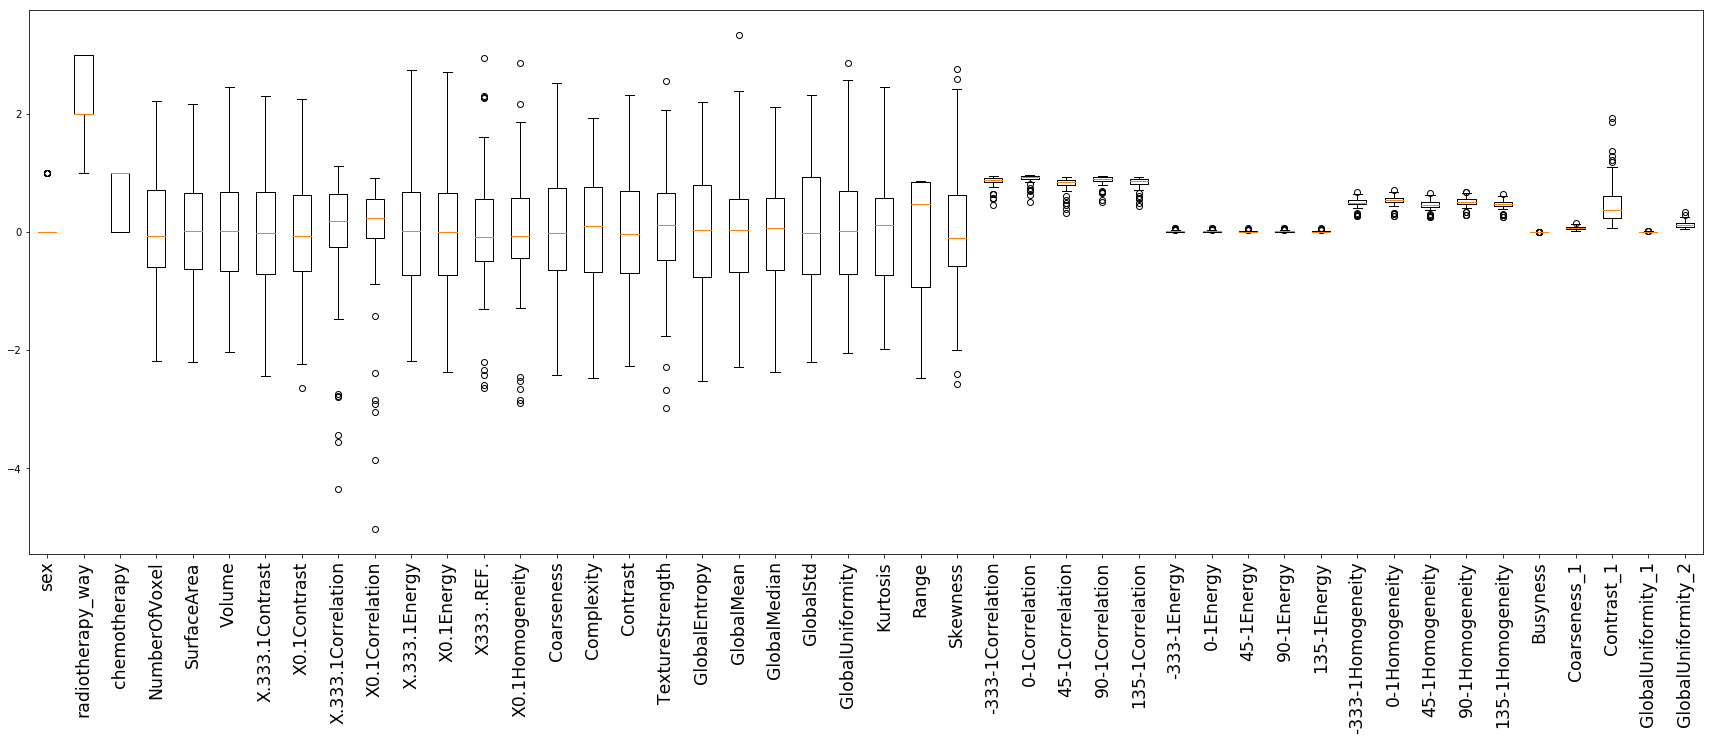

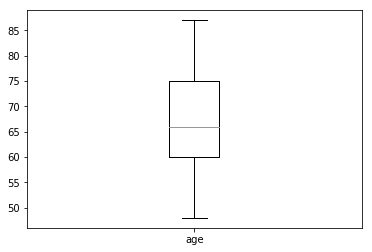

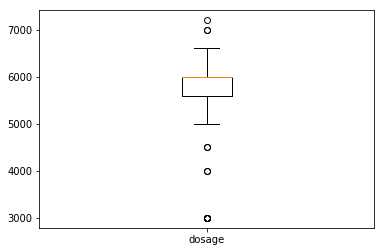

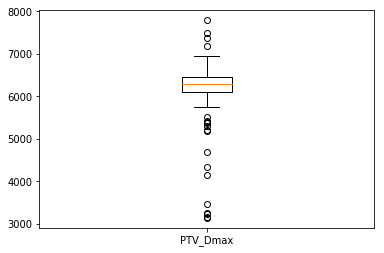

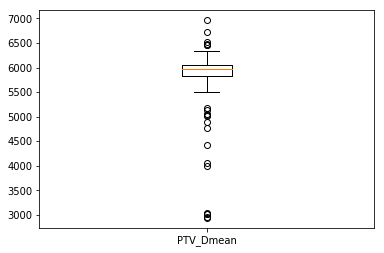

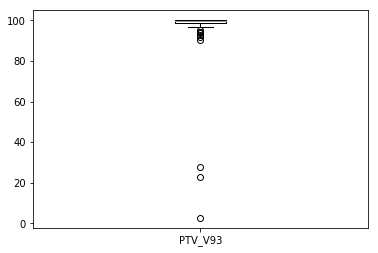

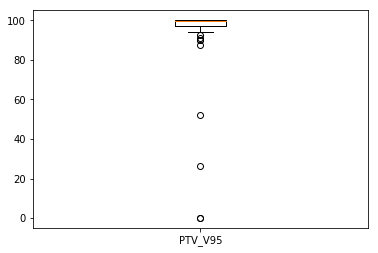

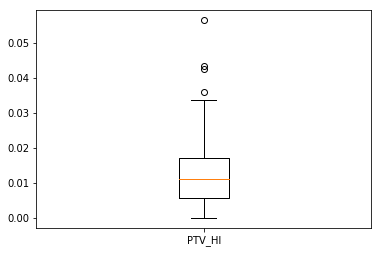

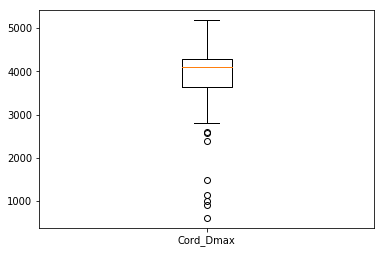

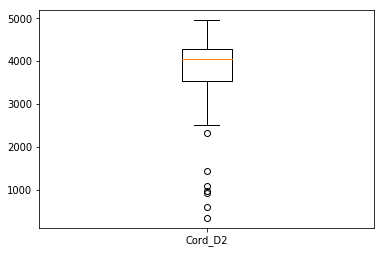

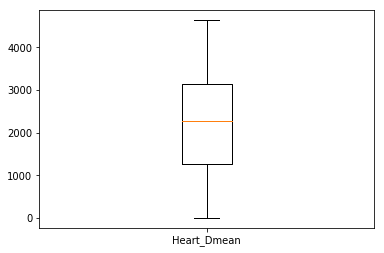

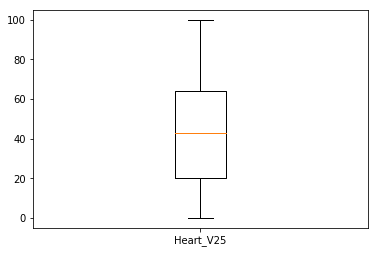

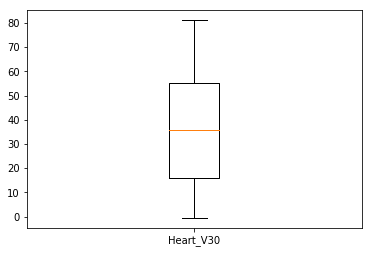

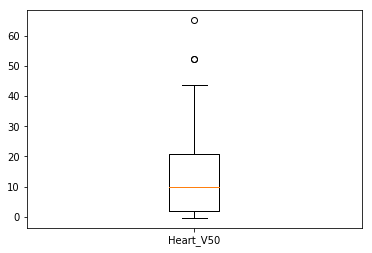

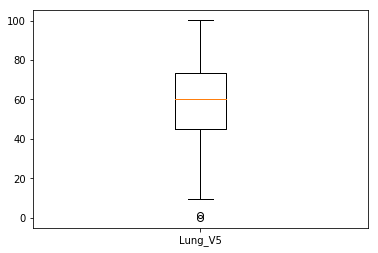

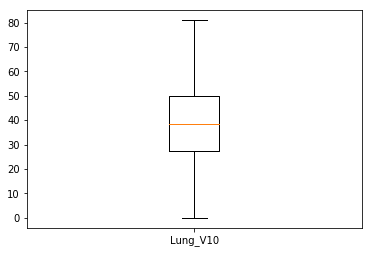

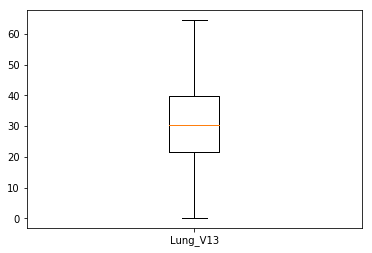

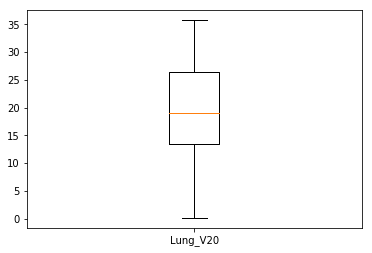

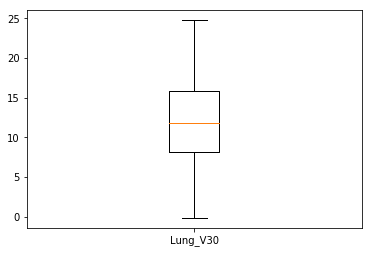

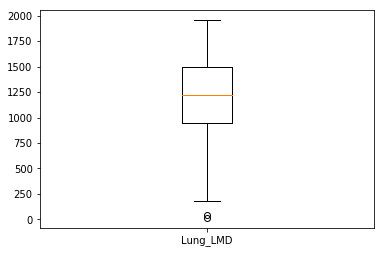

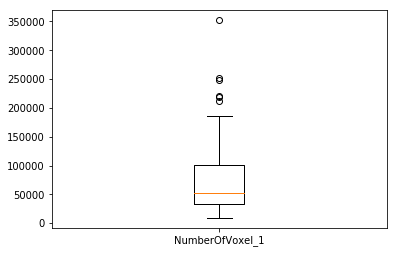

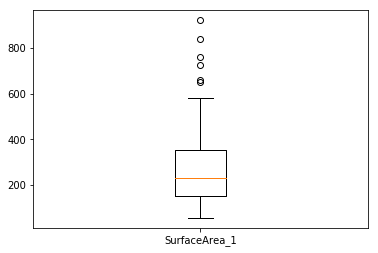

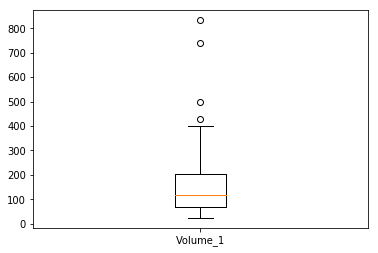

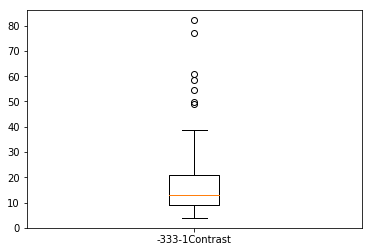

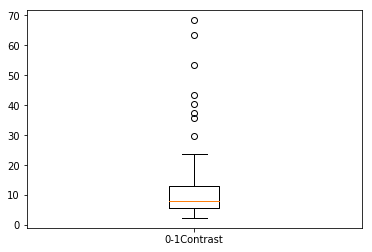

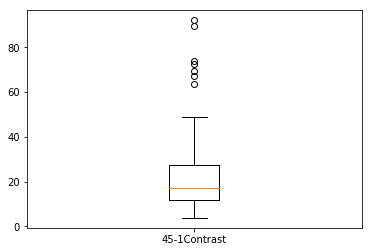

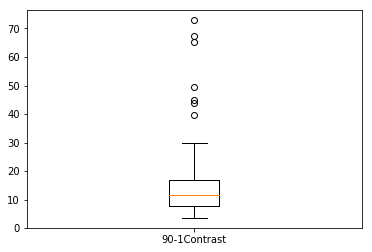

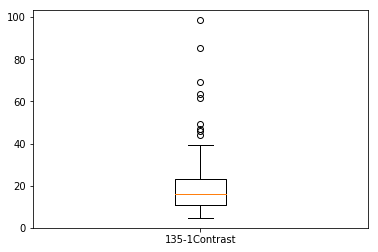

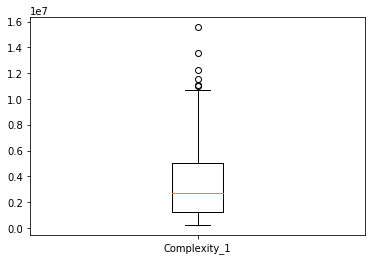

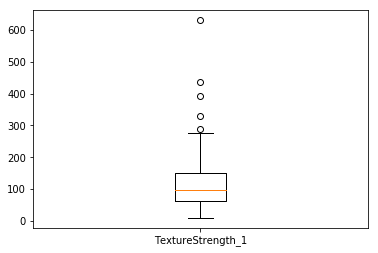

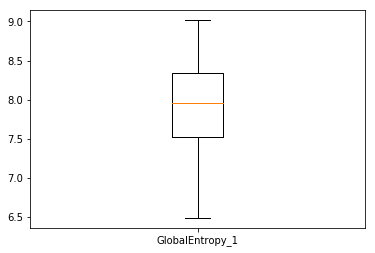

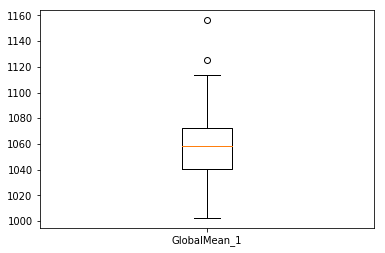

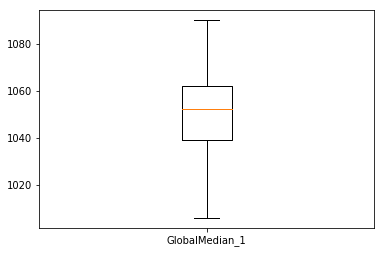

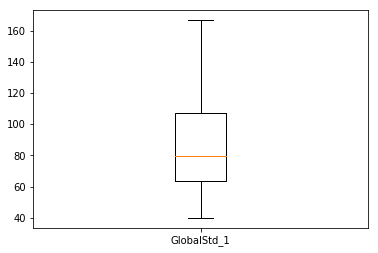

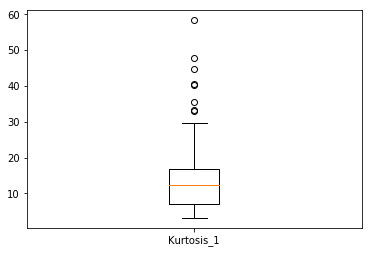

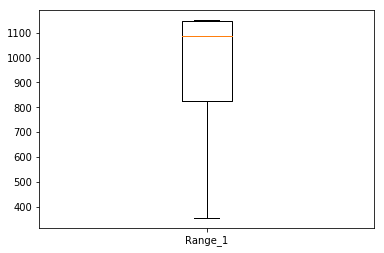

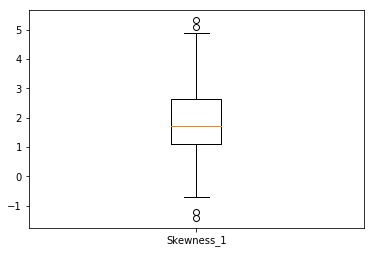

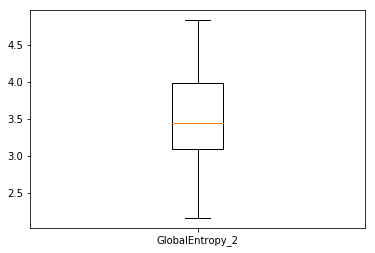

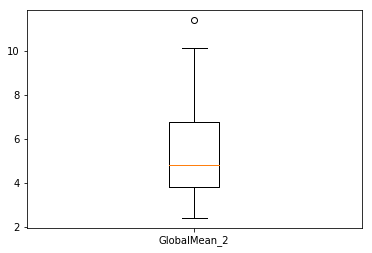

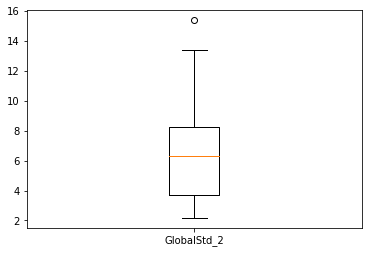

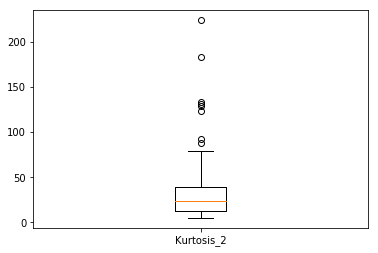

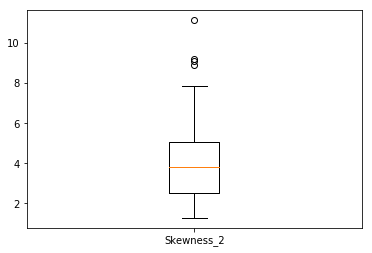

In [148]:
df_box_figure = df_copy_non_standard.drop(['evaluation','dosage','age','PTV_Dmax','PTV_Dmean','PTV_V93','PTV_V95','PTV_HI','Cord_Dmax', 'Cord_D2','Heart_Dmean','Heart_V25',
                                           'Heart_V30','Heart_V50', 'Lung_V5','Lung_V10', 'Lung_V13','Lung_V20','Lung_V30','Lung_LMD',
                                          'NumberOfVoxel_1','SurfaceArea_1','Volume_1','-333-1Contrast','0-1Contrast', '45-1Contrast', '90-1Contrast', '135-1Contrast',
                       'Complexity_1','TextureStrength_1','GlobalEntropy_1','GlobalMean_1','GlobalMedian_1',
                       'GlobalStd_1','Kurtosis_1','Range_1','Skewness_1', 'GlobalEntropy_2', 'GlobalMean_2',
                       'GlobalStd_2','Kurtosis_2','Skewness_2'],axis=1)

fig = plt.figure()
fig.set_size_inches(30,10)
ax = fig.add_subplot(111)

ax.axes.set_xticklabels(all_feature,rotation=90,fontsize = 'xx-large')
plt.boxplot(x = df_box_figure.values,sym ="o",labels = all_feature)
plt.show()

for feature in standarded_feature:
    plt.boxplot(x = df_copy_non_standard[feature].values,sym ="o",labels = [feature])
    plt.show()

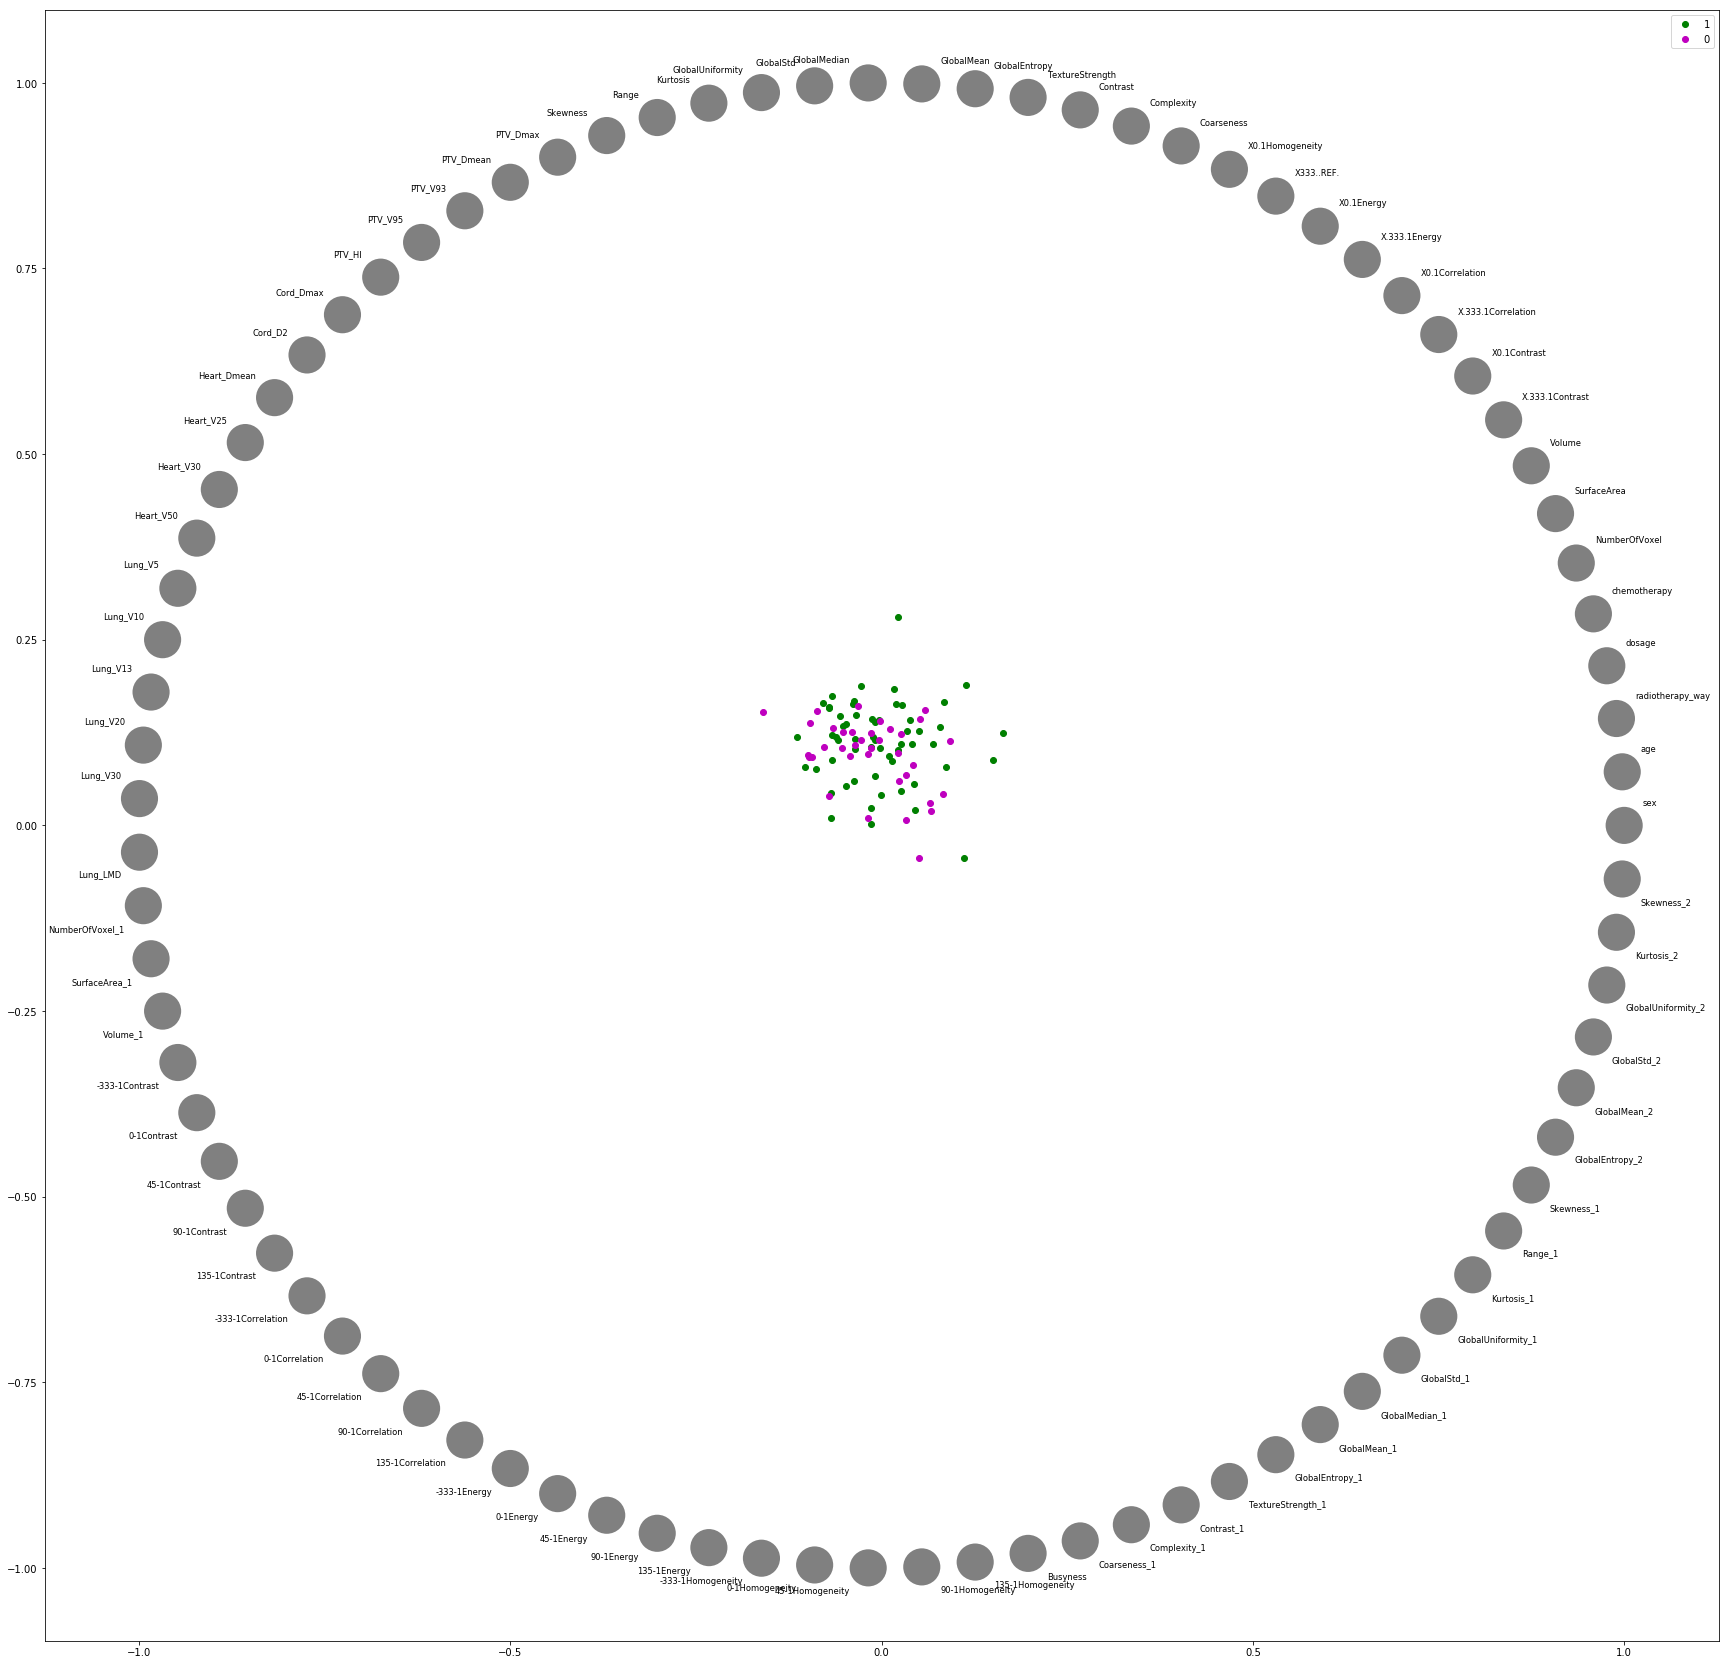

In [150]:
from pandas.plotting import radviz

fig = plt.figure()
fig.set_size_inches(30,30)
radviz(df_copy, 'evaluation',color=['g','m'])

# 皮尔森线性相关系数

[('Skewness_1', -0.16112441862496926), ('Kurtosis_1', -0.135732096151415), ('GlobalMedian', -0.1337505972074684), ('GlobalMean', -0.12356928504254658), ('Complexity_1', -0.12281908849269857), ('Heart_V50', -0.11251336457182237), ('Heart_Dmean', -0.10991023246659791), ('Lung_V5', -0.10092662290338639), ('GlobalUniformity', -0.09157811652427657), ('135-1Contrast', -0.08534882388832082), ('Lung_LMD', -0.08358075560337169), ('sex', -0.08305920978354425), ('NumberOfVoxel_1', -0.08087344993198872), ('0-1Contrast', -0.07967293421284581), ('SurfaceArea_1', -0.07929634050762717), ('-333-1Contrast', -0.07898600499492135), ('Volume_1', -0.07735437855136797), ('45-1Contrast', -0.07675213297345768), ('Coarseness', -0.07457914807142708), ('GlobalStd_1', -0.07410095010461468), ('Heart_V30', -0.07304968847104777), ('90-1Contrast', -0.06943491260294611), ('Lung_V10', -0.06707448014661928), ('GlobalStd_2', -0.06208039065803376), ('X.333.1Energy', -0.059262945284024496), ('GlobalEntropy_1', -0.0553866417

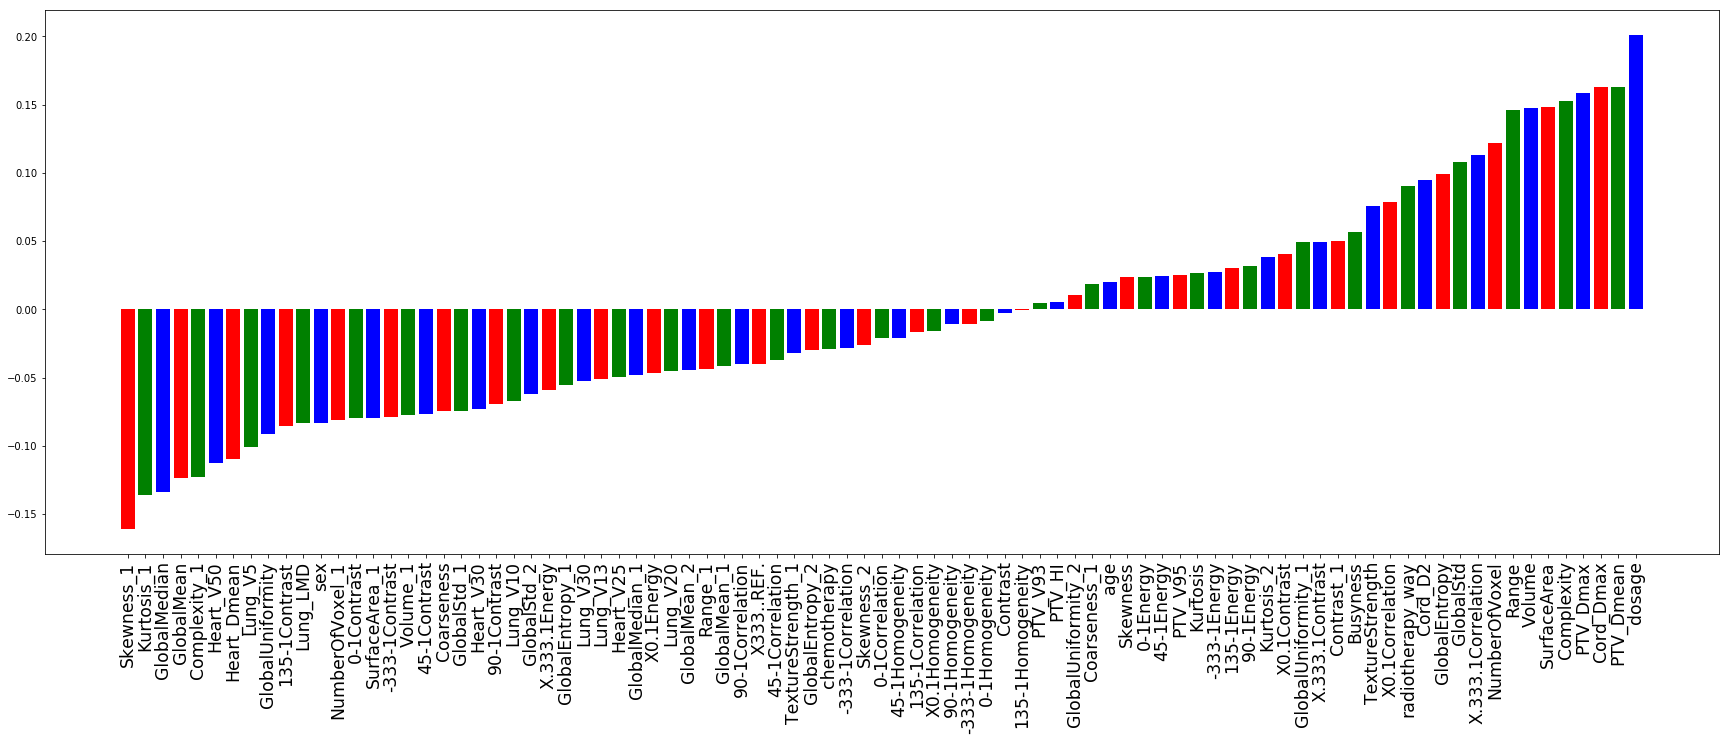

In [156]:
from scipy.stats import pearsonr   # 皮尔逊相关系数
columns=data.columns   # 把列拿出来（把特征拿出来）,df_DE_train包括了训练集和测试集
# print(columns)

feature_importance=[(column,pearsonr(data[column],label)[0]) for column in columns]
feature_importance.sort(key=lambda x:x[1])   # 对皮尔逊相关系数进行排序
print(feature_importance)
# 因为是分类的缘故，所以皮尔森线性相关系数比较接近于0，参考意义不是很大
feature = []
num = []
for i in range(len(feature_importance)):
    # print(feature_importance[i][0])
    feature = feature + [feature_importance[i][0]]

for i in range(len(feature_importance)):
    # print(feature_importance[i][1])
    num = num + [feature_importance[i][1]]

# print(feature)                
# print(num)

import matplotlib.pyplot as plt  
name_list = feature
num_list = num  

fig = plt.figure()
fig.set_size_inches(30,10)
ax = fig.add_subplot(111)
# ax.axes.set_xticks(xs)
# font = { 'size'   : 20}  
ax.axes.set_xticklabels(name_list,rotation=90,fontsize = 'xx-large')
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)  
plt.show()  

# 全部数据

In [91]:
# import numpy as np
# index = [i for i in range(len(df_copy))] 
# # print("index:",index)
# np.random.shuffle(index)   
# data = df_copy.ix[index]
# # print("index:",index)

jiliang = ['dosage','PTV_Dmax', 'PTV_Dmean', 'PTV_V93', 'PTV_V95', 'PTV_HI', 'Cord_Dmax',
       'Cord_D2', 'Heart_Dmean', 'Heart_V25', 'Heart_V30', 'Heart_V50',
       'Lung_V5', 'Lung_V10', 'Lung_V13', 'Lung_V20', 'Lung_V30', 'Lung_LMD']

data = df_copy.ix[[15, 32, 70, 79, 77,  1, 43, 73, 46, 83, 88,  5, 74, 11, 58, 66, 82,
            71, 48, 65, 81, 23, 24,  2, 41, 78, 67, 26, 68, 10, 47, 61, 31, 62,
            36, 51, 45,  0, 59, 14, 91, 72, 76, 16, 84, 57, 29, 21, 34, 19, 87,
            89, 44, 55, 30, 40, 13, 90,  4, 69, 56, 35, 33, 50, 60, 20, 54, 75,
             7, 49,
            86, 37, 42,  3, 93, 28, 27, 53, 80,  8, 63, 39, 22, 52, 92, 64,  9,
            17, 38,  6, 12, 85, 18, 25]]
# data = data.drop('dosage',axis = 1)

# for i in jiliang:
#     data = data.drop(i,axis = 1)
# print(data)

label = data.pop('evaluation')   # 这个label是series类型,把evaluation从df里面删除
label = label.astype(np.int)
# print(label)
df_label = DataFrame(label,columns = ['evaluation'])  # df_label是dataframe
# print(df_label)
label_train = df_label.iloc[:70,:]  # 训练集的标签
label_test = df_label.iloc[70:94,:]  # 测试集的标签
# print("label_train:",label_train)
# print("label_test:",label_test)
print(label_train.index)
print(label_test.index)

# data = df.drop('evaluation',axis = 1)
data_train = data.iloc[:70,:]  # 训练集的特征
data_test = data.iloc[70:94,:]  # 测试集的特征

Int64Index([15, 32, 70, 79, 77,  1, 43, 73, 46, 83, 88,  5, 74, 11, 58, 66, 82,
            71, 48, 65, 81, 23, 24,  2, 41, 78, 67, 26, 68, 10, 47, 61, 31, 62,
            36, 51, 45,  0, 59, 14, 91, 72, 76, 16, 84, 57, 29, 21, 34, 19, 87,
            89, 44, 55, 30, 40, 13, 90,  4, 69, 56, 35, 33, 50, 60, 20, 54, 75,
             7, 49],
           dtype='int64')
Int64Index([86, 37, 42,  3, 93, 28, 27, 53, 80,  8, 63, 39, 22, 52, 92, 64,  9,
            17, 38,  6, 12, 85, 18, 25],
           dtype='int64')


# 所有特征集+PCA

In [94]:
# PCA
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV

model = PCA()
param_grid = {'n_components':[10,11,12,13,14,15,16,17,18,19,20,
                           21,34,36,38,39,40,41,42,43,44,45]}
grid_search = GridSearchCV(model, param_grid, n_jobs=1, verbose=1,cv=3)
grid_search.fit(data_train,label_train)
best_parameters = grid_search.best_estimator_.get_params()
pca = PCA(n_components=best_parameters['n_components'])

# pca=PCA(n_components=5)
newData=pca.fit_transform(data)
print(newData.shape)
print(best_parameters['n_components'])

Fitting 3 folds for each of 22 candidates, totalling 66 fits
(94, 17)
17


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.1s finished


In [95]:
newData = DataFrame(newData)
data_train_pca = newData.iloc[:70,:]  # 训练集的特征
data_test_pca = newData.iloc[70:94,:]  # 测试集的特征import xgboost as xgb

In [96]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(
 learning_rate =0.001,
 n_estimators=10,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model_xgb.fit(data_train_pca, label_train,eval_set=[(data_train_pca, label_train)], eval_metric='auc')

[0]	validation_0-auc:0.837258
[1]	validation_0-auc:0.910849
[2]	validation_0-auc:0.939865
[3]	validation_0-auc:0.954584
[4]	validation_0-auc:0.960471
[5]	validation_0-auc:0.963835
[6]	validation_0-auc:0.969722
[7]	validation_0-auc:0.970563
[8]	validation_0-auc:0.978133
[9]	validation_0-auc:0.983179


C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.001,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 对测试集预测
ans = model_xgb.predict(data_test_pca)
predictions_proba = model_xgb.predict_proba(data_test_pca)
print(ans)
print('测试集准确率：',accuracy_score(label_test, ans))
print('测试集精确率：',precision_score(label_test, ans))
print('测试集召回率：',recall_score(label_test, ans))
print('测试集F1：',f1_score(label_test, ans))

# 对训练集预测
ans = model_xgb.predict(data_train_pca)
print(ans)
print('训练集准确率：',accuracy_score(label_train, ans))
print('训练集精确率：',precision_score(label_train, ans))
print('训练集召回率：',recall_score(label_train, ans))
print('训练集F1：',f1_score(label_train, ans))

from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error, r2_score
for metric in ['explained_variance_score', 'mean_absolute_error', 'median_absolute_error', 'r2_score']:
    print('xgb_'+metric, eval(metric+'(label_test, model_xgb.predict(data_test_pca))'))

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0]
测试集准确率： 0.75
测试集精确率： 0.8235294117647058
测试集召回率： 0.8235294117647058
测试集F1： 0.8235294117647058
[1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0]
训练集准确率： 0.9142857142857143
训练集精确率： 0.8888888888888888
训练集召回率： 0.975609756097561
训练集F1： 0.9302325581395349
xgb_explained_variance_score -0.21008403361344552
xgb_mean_absolute_error 0.25
xgb_median_absolute_error 0.0
xgb_r2_score -0.21008403361344552


C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-package

0.7731092436974789


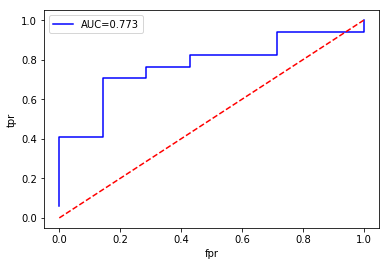

In [98]:
fpr1,tpr1,thresholds = roc_curve(label_test,predictions_proba[:,1],pos_label = 1)
roc_auc1 = auc(fpr1,tpr1)
print(roc_auc1)
# f_score = f1_score(label_test,ans_proba[:,1])
plt.figure()
# plt.title('ROC curve,f score = %.4f'%f_score)
plt.plot(fpr1,tpr1,'b',label='AUC=%.3f'%roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

# 直接xgboost

In [99]:
model_xgb = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=10,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model_xgb.fit(data_train, label_train,eval_set=[(data_train, label_train)], eval_metric='auc')

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 对测试集预测
ans = model_xgb.predict(data_test)
predictions_proba = model_xgb.predict_proba(data_test)
print(ans)
print('测试集准确率：',accuracy_score(label_test, ans))
print('测试集精确率：',precision_score(label_test, ans))
print('测试集召回率：',recall_score(label_test, ans))
print('测试集F1：',f1_score(label_test, ans))

# 对训练集预测
ans = model_xgb.predict(data_train)
print(ans)
print('训练集准确率：',accuracy_score(label_train, ans))
print('训练集精确率：',precision_score(label_train, ans))
print('训练集召回率：',recall_score(label_train, ans))
print('训练集F1：',f1_score(label_train, ans))

from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error, r2_score
for metric in ['explained_variance_score', 'mean_absolute_error', 'median_absolute_error', 'r2_score']:
    print('xgb_'+metric, eval(metric+'(label_test, model_xgb.predict(data_test))'))

[0]	validation_0-auc:0.796888
[1]	validation_0-auc:0.898234
[2]	validation_0-auc:0.96804
[3]	validation_0-auc:0.955845
[4]	validation_0-auc:0.967199
[5]	validation_0-auc:0.956266
[6]	validation_0-auc:0.982338
[7]	validation_0-auc:0.971405
[8]	validation_0-auc:0.979815
[9]	validation_0-auc:0.990749
[0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1]
测试集准确率： 0.625
测试集精确率： 0.75
测试集召回率： 0.7058823529411765
测试集F1： 0.7272727272727272
[1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0]
训练集准确率： 0.9428571428571428
训练集精确率： 0.9111111111111111
训练集召回率： 1.0
训练集F1： 0.9534883720930233
xgb_explained_variance_score -0.8067226890756305
xgb_mean_absolute_error 0.375
xgb_median_absolute_error 0.0
xgb_r2_score -0.8151260504201683


C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preproces

0.5378151260504203


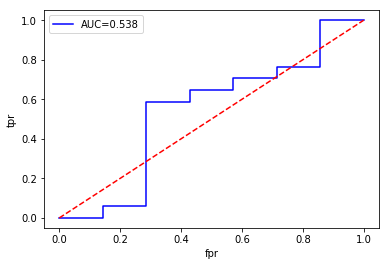

In [100]:
fpr2,tpr2,thresholds = roc_curve(label_test,predictions_proba[:,1],pos_label = 1)
roc_auc2 = auc(fpr2,tpr2)
print(roc_auc2)
# f_score = f1_score(label_test,ans_proba[:,1])
plt.figure()
# plt.title('ROC curve,f score = %.4f'%f_score)
plt.plot(fpr2,tpr2,'b',label='AUC=%.3f'%roc_auc2)
# plt.plot(fpr1,tpr1,'b',label='AUC=%.3f'%roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

# 所有特征集减去所有剂量相关参数，即只剩下radiomics +性别、年龄、方式

In [101]:
# import numpy as np
# index = [i for i in range(len(df_copy))] 
# # print("index:",index)
# np.random.shuffle(index)   
# data = df_copy.ix[index]
# # print("index:",index)

jiliang = ['dosage','PTV_Dmax', 'PTV_Dmean', 'PTV_V93', 'PTV_V95', 'PTV_HI', 'Cord_Dmax',
       'Cord_D2', 'Heart_Dmean', 'Heart_V25', 'Heart_V30', 'Heart_V50',
       'Lung_V5', 'Lung_V10', 'Lung_V13', 'Lung_V20', 'Lung_V30', 'Lung_LMD']

data = df_copy.ix[[15, 32, 70, 79, 77,  1, 43, 73, 46, 83, 88,  5, 74, 11, 58, 66, 82,
            71, 48, 65, 81, 23, 24,  2, 41, 78, 67, 26, 68, 10, 47, 61, 31, 62,
            36, 51, 45,  0, 59, 14, 91, 72, 76, 16, 84, 57, 29, 21, 34, 19, 87,
            89, 44, 55, 30, 40, 13, 90,  4, 69, 56, 35, 33, 50, 60, 20, 54, 75,
             7, 49,
            86, 37, 42,  3, 93, 28, 27, 53, 80,  8, 63, 39, 22, 52, 92, 64,  9,
            17, 38,  6, 12, 85, 18, 25]]
# data = data.drop('dosage',axis = 1)

for i in jiliang:
    data = data.drop(i,axis = 1)
print(data)

label = data.pop('evaluation')   # 这个label是series类型,把evaluation从df里面删除
label = label.astype(np.int)
# print(label)
df_label = DataFrame(label,columns = ['evaluation'])  # df_label是dataframe
# print(df_label)
label_train = df_label.iloc[:70,:]  # 训练集的标签
label_test = df_label.iloc[70:94,:]  # 测试集的标签
# print("label_train:",label_train)
# print("label_test:",label_test)
print(label_train.index)
print(label_test.index)

# data = df.drop('evaluation',axis = 1)
data_train = data.iloc[:70,:]  # 训练集的特征
data_test = data.iloc[70:94,:]  # 测试集的特征

         sex       age  radiotherapy_way  chemotherapy  evaluation  \
15 -0.345033 -1.151116         -0.272103     -1.359590           0   
32 -0.345033 -0.298269         -0.272103      0.735516           0   
70 -0.345033  0.554577         -0.272103      0.735516           0   
79 -0.345033 -1.151116         -1.693087     -1.359590           0   
77 -0.345033 -0.831298         -0.272103      0.735516           1   
1  -0.345033 -1.044510         -1.693087     -1.359590           1   
43 -0.345033 -0.085058         -0.272103      0.735516           1   
73 -0.345033  0.554577         -0.272103      0.735516           0   
46 -0.345033  0.874394         -0.272103     -1.359590           1   
83 -0.345033 -0.937904         -0.272103      0.735516           1   
88 -0.345033  1.194211         -0.272103     -1.359590           1   
5  -0.345033 -0.191664          1.148881      0.735516           1   
74 -0.345033  0.447971         -0.272103     -1.359590           1   
11 -0.345033 -0.2982

In [102]:
model_xgb = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=10,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model_xgb.fit(data_train, label_train,eval_set=[(data_train, label_train)], eval_metric='auc')

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 对测试集预测
ans = model_xgb.predict(data_test)
predictions_proba = model_xgb.predict_proba(data_test)
print(ans)
print('测试集准确率：',accuracy_score(label_test, ans))
print('测试集精确率：',precision_score(label_test, ans))
print('测试集召回率：',recall_score(label_test, ans))
print('测试集F1：',f1_score(label_test, ans))

# 对训练集预测
ans = model_xgb.predict(data_train)
print(ans)
print('训练集准确率：',accuracy_score(label_train, ans))
print('训练集精确率：',precision_score(label_train, ans))
print('训练集召回率：',recall_score(label_train, ans))
print('训练集F1：',f1_score(label_train, ans))

from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error, r2_score
for metric in ['explained_variance_score', 'mean_absolute_error', 'median_absolute_error', 'r2_score']:
    print('xgb_'+metric, eval(metric+'(label_test, model_xgb.predict(data_test))'))

[0]	validation_0-auc:0.829268
[1]	validation_0-auc:0.875946
[2]	validation_0-auc:0.931876
[3]	validation_0-auc:0.965517
[4]	validation_0-auc:0.965938
[5]	validation_0-auc:0.965938
[6]	validation_0-auc:0.976871
[7]	validation_0-auc:0.974348
[8]	validation_0-auc:0.979394
[9]	validation_0-auc:0.980656
[0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1]
测试集准确率： 0.6666666666666666
测试集精确率： 0.8
测试集召回率： 0.7058823529411765
测试集F1： 0.7500000000000001
[0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0]
训练集准确率： 0.8857142857142857
训练集精确率： 0.851063829787234
训练集召回率： 0.975609756097561
训练集F1： 0.9090909090909092
xgb_explained_variance_score -0.5798319327731087
xgb_mean_absolute_error 0.3333333333333333
xgb_median_absolute_error 0.0
xgb_r2_score -0.6134453781512605


C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\software_out_of_system\Anaconda3-5.1.0-Windows-x86_64\lib\site-packages\sklearn\preproces

0.6302521008403361


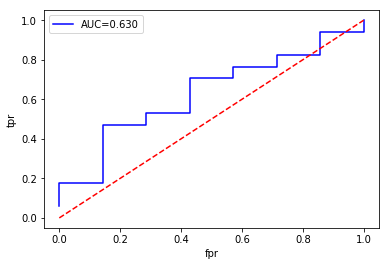

In [136]:
fpr3,tpr3,thresholds = roc_curve(label_test,predictions_proba[:,1],pos_label = 1)
# fpr3,tpr3,thresholds = roc_curve(label_test,ans_proba[:,1],pos_label = 1)
roc_auc3 = auc(fpr3,tpr3)
print(roc_auc3)
# f_score = f1_score(label_test,ans_proba[:,1])
plt.figure()
# plt.title('ROC curve,f score = %.4f'%f_score)
plt.plot(fpr3,tpr3,'b',label='AUC=%.3f'%roc_auc3)
# plt.plot(fpr1,tpr1,'b',label='AUC=%.3f'%roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

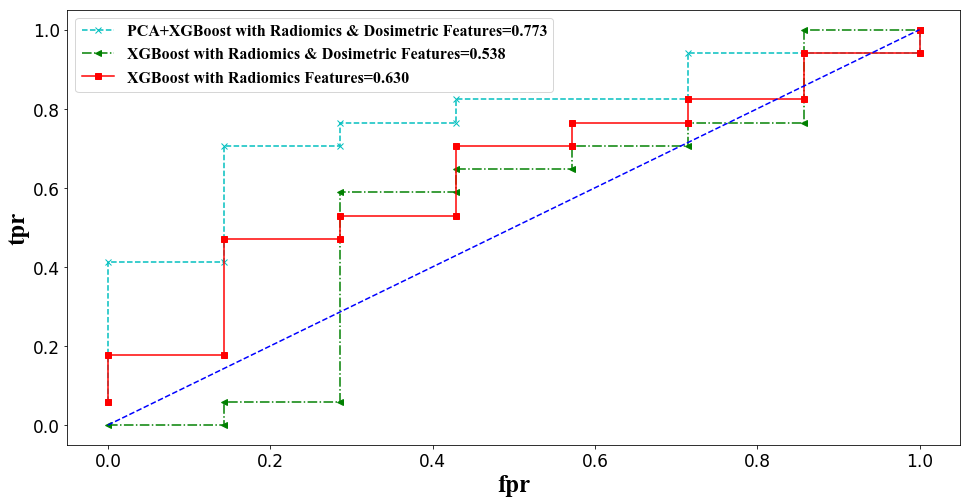

In [145]:
# plt.figure()
fig = plt.figure()
fig.set_size_inches(16,8)
# plt.title('ROC curve,f score = %.4f'%f_score)

# 设置图例并且设置图例的字体及大小
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 16,
         }
# legend = plt.legend(handles=[A, B], prop=font1)

# plt.plot(fpr1,tpr1,'cx--',label='AUC1=%.3f'%roc_auc1)
# plt.plot(fpr2,tpr2,'g<-.',label='AUC2=%.3f'%roc_auc2)
# plt.plot(fpr3,tpr3,'rs-',label='AUC3=%.3f'%roc_auc3)

plt.plot(fpr1,tpr1,'cx--',label='PCA+XGBoost with Radiomics & Dosimetric Features=%.3f'%roc_auc1)
plt.plot(fpr2,tpr2,'g<-.',label='XGBoost with Radiomics & Dosimetric Features=%.3f'%roc_auc2)
plt.plot(fpr3,tpr3,'rs-',label='XGBoost with Radiomics Features=%.3f'%roc_auc3)

# 设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=17)

# 设置横纵坐标的名称以及对应字体格式
font2 = {'family':'Times New Roman',
         'weight': 'normal',
         'size': 25,
         }

plt.plot([0,1],[0,1],'b--')
plt.xlabel('fpr',font2 )
plt.ylabel('tpr',font2 )
plt.legend(prop=font1)
# plt.legend()
plt.show()